# 1

$X_i$ follows a Bernoulii distribution

# 2

According to Central Limit Theorem,

$$\overline X_n \sim \mathcal{N}\Big(p, \frac{p(1 - p)}{n}\Big)$$

where $p$ is the percentage of people with salary larger than the threshold $z$.

TODO: Could try to derive CLT for Ber.

# 3

Exponential distribution:

$$\mathbb{P}[X=x] = \lambda e^{-\lambda x}$$

Based on defintion,

\begin{align*}
p 
&= \int_z^{\infty} \lambda e^{-\lambda}xdx \\
&= \big[-e^{-\lambda x} \big]_z^{\infty} \\
&= e^{-\lambda z}
\end{align*}

So

\begin{align*}
\hat p &= \overline X_n = e^{-\hat \lambda z} \\
\hat \lambda &= -\frac{\ln \overline X_n}{z}
\end{align*}

# 4

According to the Delta Method (https://en.wikipedia.org/wiki/Delta_method),

When 

$$\overline X_n \sim \mathcal{N}\Big(\mu, \frac{\sigma^2}{n}\Big)$$

then

\begin{align*}
g(\overline X_n) 
&\sim \mathcal{N}\Big(g(\overline X_n), \big(g'(\mu)\big)^2\frac{\sigma^2}{n}\Big)
\end{align*}

Here,

\begin{align*}
\overline X_n 
&\sim \mathcal{N}\Big(p, \frac{p(1 - p)}{n}\Big) \\
g(\overline X_n)
&= \hat \lambda = -\frac{\ln \overline X_n}{z} \\
g(p)'
&=-\frac{1}{p z}
\end{align*}

So

\begin{align*}
\hat \lambda
&\sim \mathcal{N}\Big(-\frac{\ln p}{z}, \frac{1}{(p z)^2}\frac{p(1-p)}{n}\Big) \\
&=  \mathcal{N}\Big(-\frac{\ln p}{z}, \frac{1-p}{npz^2}\Big) \\
\end{align*}

I also asked a variant of this question on https://stats.stackexchange.com/questions/385131/is-logarithm-of-the-mean-of-bernoulli-random-variables-log-overline-x-stil

# 5

The asymptotic variance:

\begin{align*}
V
&= \frac{1-p}{npz^2} \\
&= \frac{1}{n}z^{-2}\Big(\frac{1}{p} - 1\Big) \\
&= \frac{1}{n}z^{-2}\Big(e^{\lambda z} - 1\Big) \\
\end{align*}

Taking derivative and set it to 0,

\begin{align*}
\frac{\partial V}{\partial z}
= -\frac{2}{n}z^{-3}\big(e^{\lambda z} - 1\big) + \frac{\lambda}{n}z^{-2}e^{\lambda z} &= 0 \\ 
-2\big(e^{\lambda z} - 1\big) + \lambda z e^{\lambda z} &= 0 \\
e^{\lambda z}(2 - \lambda z) &= 2 \\
\end{align*}

We obtain (with help of https://www.wolframalpha.com/input/?i=solve+z+for+z+in+e%5E%7B%5Clambda+z%7D(2-%5Clambda+z)+%3D+2)

$$g_{\lambda}(z) = \frac{W\Big(-\frac{2}{e^2}\Big) + 2}{\lambda}$$

$W$ is the Lambert W function (http://mathworld.wolfram.com/LambertW-Function.html).

# 6

#### (a)

The problem description says taht $Y$ shall follow a exponential distribution,

$$\mathbb{P}[Y = y] = \lambda e^{-\lambda y}$$

#### (b)

The Fisher information of an exponential distribution has been shown in Problem-1, so

$$I_Y(\lambda) = \frac{1}{\lambda^2}$$

#### (c)

When only $X_i$'s are obversed, the model is Bernoulli distribution, and the corresponding Fisher information has already been derived in Problem-1,

\begin{align*}
I_X(\lambda) 
&= \frac{1}{p} + \frac{1}{1-p} \\
&= \frac{1}{e^{-\lambda z}} + \frac{1}{1 - e^{-\lambda z}} \\
&= \frac{1}{e^{-\lambda z}(1 - e^{-\lambda z})} \\
&= \frac{e^{\lambda z}}{1 - e^{-\lambda z}} \\
\end{align*}

#### (d)

* For $I_Y(\lambda)$, the larger the $\lambda$, the less the Fisher information.
* $I_X(\lambda)$ is a function of $p = e^{-\lambda z}$ and $p \in (0, 1)$, so $I_X(\lambda)$ decreases first when $p$ goes up from 0, and then increases again when $p$ goes close to 1. $I_X(\lambda) > 4$.

# Debug

In [54]:
p = np.arange(0.001, 1, 0.01)

In [55]:
# y1s = 1 / (lambs ** 2)
y2s = 1 / (p * (1 - p))

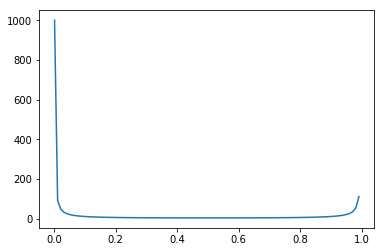

In [56]:
plt.plot(p, y2s)

In [24]:
np.exp(-lambs * z)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [33]:
np.exp(-lambs * z)

array([  1.00000000e+000,   3.72007598e-044,   1.38389653e-087,
         5.14820022e-131,   1.91516960e-174,   7.12457641e-218,
         2.65039655e-261,   9.85967654e-305,   0.00000000e+000,
         0.00000000e+000])

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

In [3]:
p  = 0.3

In [4]:
res = []
for i in range(1000): # draw 1000 samples and calculate each x_bar
    x_bar = np.mean(np.random.binomial(1, p, 100000))
    res.append(x_bar)

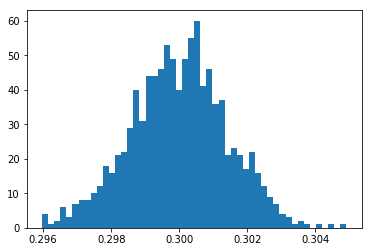

In [5]:
_ = plt.hist(res, bins=50)

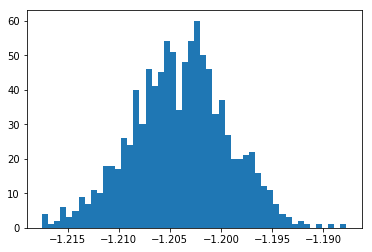

In [6]:
_ = plt.hist(np.log(res), bins=50)